0/1,예/아니오 등 두개의 답 중 하나만 내놔야하는 경우에 로지스틱회귀(Logistic Regression)을 사용할 수 있다.

로지스틱 회귀에서 사용하는 함수를 활성화함수(activation function)이라고 하는데, 이 활성화 함수에는 시그모이드, 렐루 등의 함수가 대표적이다.

그 중에서 시그모이드 함수는 $y = {1 \over 1+e^{-(ax+b)}}$이고, 로지스틱 회귀 문제는 이 함수에서의 $a, b$값을 구하는 것이다. 여기서 $a$는 함수의 경사도, $b$는 함수의 좌우 이동 정도를 나타내게 된다.

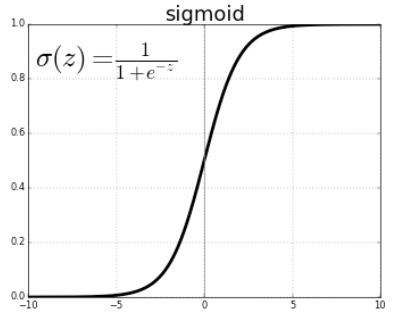

위의 sigmoid function은 0보다 큰 지점에서 1에 가까워져야하고, 0보다 작은 지점에서 0에 가까워져야한다.

여기서 $a$값이 커지는 경우는 오차가 무한으로 커지지는 않겠지만, $a$값이 0으로 작아지면 오차가 무한히 커질 것이다. 0.5에 걸친 직선형태가 될테니깐...

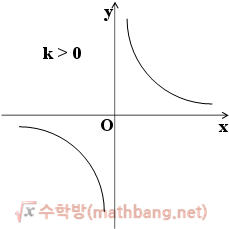

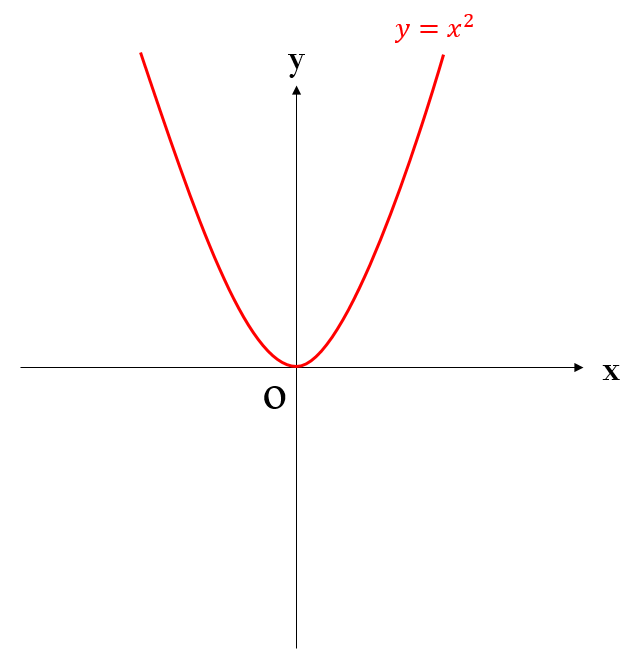

$a, b$에 대한 각각의 오차 정도는 이렇게 될 것이다. x는 지정한 $a,b$의 값, y축은 오차의 크기

시그모이드 함수의 $a,b$는 경사하강법을 통해서 구한다.

로그함수를 이용해서 시그모이드 함수의 오차를 다음과 같이 쓴다.

~~왜 제곱평균으로 구하지 않는 지는 잘 모르겠다. 아마 경사하강법을 도입할 때 시그모이드 함수의 a값이 커질때 오차가 작아지니까, 계속해서 a가 커지는 방향으로만 가는 것을 우려해서 이렇게 오차함수를 새로 정의하는 것 같다. 딥러닝에 관한 수학적 공부를 더 해야 파악할 수 있을 듯?~~

h는 시그모이드 함수값이다. 그리고 logh는 오차값이다. y_data는 실제값(0 or 1)이다.

$-\{y_{data}log(h) + (1-y_{data}log(1-h))\}$

책에선 하지 않지만 난 이 오차함수의 편미분 결과를 도출해낼 것이다. 만약 당신이 문과생이라면 그저 묵념...

우선 시그모이드 함수의 미분은
$sig'(x) = ({1 \over 1+e^{(-x)}})' = sig(a)(1-sig(a))$
이므로, chain rule에 의해 시그모이드 함수에 대한(오차함수가 아니다) $a, b$의 편미분은

$sig(ax+b)(1-sig(ax+b))x$

$sig(ax+b)(1-sig(ax+b))$

이렇게 되고, 이것을 기반으로

$-\{y_{data}log(h) + (1-y_{data}log(1-h))\} = -\{y_{data}log(sig(ax+b)) + (1-y_{data}log(1-sig(ax+b)))\}$

을 편미분하면... ~~아 하기 싫다~~

$y{sig'(ax+b) \over sig(ax+b)} - (1-y){sig'(ax+b) \over 1-sig(ax+b)}$이렇게 되고, 시그모이드 함수의 $a, b$의 편미분 결과를 대입하면 각각 이렇게 나올 것이다.

$x(sig(ax+b) - y)$

$(sig(ax+b) - y)$

내가 해봤다. 날 믿어라.

사용되는 라이브러리 함수들

[*args, **kwargs에 대하여](https://brunch.co.kr/@princox/180#:~:text=kwargs는%20keyword%20argument의,함수%20내부로%20전달됩니다.)

[matplotlib.pyplot.xlim(*args, **kwargs)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html#matplotlib.pyplot.xlim) 

주로 이렇게 사용한다.

> left, right = xlim()  # return the current xlim

> xlim((left, right))   # set the xlim to left, right 

> xlim(left, right)     # set the xlim to left, right

ylim도 마찬가지이다.


----
이건 함수가 아니라 constant다

[numpy.e](https://numpy.org/doc/stable/reference/constants.html)

Euler’s constant : e = 2.71828182845904523536028747135266249775724709369995...

----

[numpy.arange([start, ]stop, [step, ]dtype=None, *, like=None)
](https://numpy.org/doc/stable/reference/generated/numpy.arange.html?highlight=arange#numpy.arange)


(-0.1, 1.1)

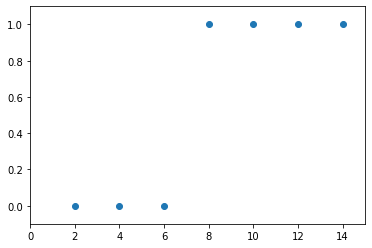

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#공부시간 X와 성적 Y의 리스트를 만듭니다.
data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]

x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

#그래프로 나타내 봅니다.
plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)

In [ ]:
# 기울기 a와 절편 b의 값을 초기화 합니다.
a = 0
b = 0

#학습률을 정합니다.
lr = 0.05 

#시그모이드 함수를 정의합니다.
def sigmoid(x):
    return 1 / (1 + np.e ** (-x))

#경사 하강법을 실행합니다.
for i in range(2001):
    for x_data, y_data in data:
        a_diff = x_data*(sigmoid(a*x_data + b) - y_data) 
        b_diff = sigmoid(a*x_data + b) - y_data
        a = a - lr * a_diff
        b = b - lr * b_diff
        if i % 1000 == 0:    # 1000번 반복될 때마다 각 x_data값에 대한 현재의 a값, b값을 출력합니다.
            print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))


epoch=0, 기울기=-0.0500, 절편=-0.0250
epoch=0, 기울기=-0.1388, 절편=-0.0472
epoch=0, 기울기=-0.2268, 절편=-0.0619
epoch=0, 기울기=0.1201, 절편=-0.0185
epoch=0, 기울기=0.2374, 절편=-0.0068
epoch=0, 기울기=0.2705, 절편=-0.0040
epoch=0, 기울기=0.2860, 절편=-0.0029
epoch=1000, 기울기=1.4978, 절편=-9.9401
epoch=1000, 기울기=1.4940, 절편=-9.9411
epoch=1000, 기울기=1.4120, 절편=-9.9547
epoch=1000, 기울기=1.4949, 절편=-9.9444
epoch=1000, 기울기=1.4982, 절편=-9.9440
epoch=1000, 기울기=1.4984, 절편=-9.9440
epoch=1000, 기울기=1.4985, 절편=-9.9440
epoch=2000, 기울기=1.9065, 절편=-12.9489
epoch=2000, 기울기=1.9055, 절편=-12.9491
epoch=2000, 기울기=1.8515, 절편=-12.9581
epoch=2000, 기울기=1.9057, 절편=-12.9514
epoch=2000, 기울기=1.9068, 절편=-12.9513
epoch=2000, 기울기=1.9068, 절편=-12.9513
epoch=2000, 기울기=1.9068, 절편=-12.9513


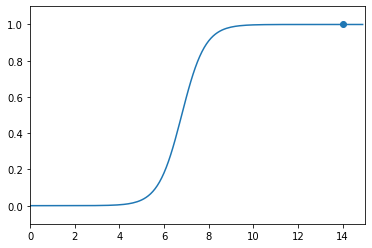

In [ ]:
# 앞서 구한 기울기와 절편을 이용해 그래프를 그려 봅니다.
plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
x_range = (np.arange(0, 15, 0.1)) #그래프로 나타낼 x값의 범위를 정합니다.
plt.plot(np.arange(0, 15, 0.1), np.array([sigmoid(a*x + b) for x in x_range]))
plt.show()

세개 이상의 입력값은 소프트맥스 함수를 사용해야한다 카더라

다음시간은 퍼셉트론이다.

좀 더 수치해석적인 방법으로 경사하강법을 실시할 수 있으면 좋지 않을까....란 생각이 든다.